# Debugging Ulmo on 2020s

In [22]:
# imports
import os
import numpy as np 

from ulmo import io as ulmo_io
from ulmo.plotting import plotting
from ulmo.utils import image_utils

# Load Table

In [23]:
modis_2020s = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_20202021.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_20202021.parquet


# Grab a high DT

In [24]:
modis_2020s['DT'] = modis_2020s.T90 - modis_2020s.T10

In [25]:
highDT_idx = np.where(modis_2020s.DT > 5.)[0]

In [26]:
modis_2020s.iloc[highDT_idx[0]]

filename            /tank/xavier/Oceanography/data/MODIS/SST/night...
row                                                               127
col                                                               554
lat                                                        -34.933342
lon                                                         22.407885
clear_fraction                                               0.049805
field_size                                                        128
datetime                                          2020-04-30 23:40:00
ex_filename         s3://modis-l2/Extractions/MODIS_R2019_2020_95c...
pp_file             s3://modis-l2/PreProc/MODIS_R2019_2020_95clear...
pp_root                                                      standard
pp_idx                                                           2288
pp_type                                                             0
mean_temperature                                            19.330912
Tmin                

# Show it

## Load

In [27]:
cutout = modis_2020s.iloc[highDT_idx[0]]
#local_file = os.path.join(os.getenv('SST_OOD'), 'MODIS_L2', 'PreProc', cutout.pp_file)
local_file = '/tank/xavier/Oceanography/Python/ulmo/ulmo/runs/SSL/MODIS/v4/PreProc/MODIS_R2019_2020_95clear_128x128_preproc_standard.h5'
img0 =  image_utils.grab_image(cutout, local_file=local_file)

## Show

<AxesSubplot:>

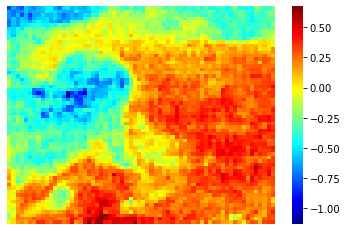

In [28]:
plotting.show_image(img0)

In [29]:
img0.max() - img0.min()

1.8008881